In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]

data = {}
for sym in symbols:
    data[sym] = yf.download(sym, start="2018-01-01", end="2025-01-01")

print(data["AAPL"].head())

/tmp/ipython-input-192627604.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-192627604.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-192627604.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-192627604.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 comple

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.304165  40.313526  39.602246  39.812824  102223600
2018-01-03  40.297150  40.839968  40.233980  40.367342  118071600
2018-01-04  40.484333  40.587282  40.262059  40.369685   89738400
2018-01-05  40.945263  41.031832  40.489016  40.580266   94640000
2018-01-08  40.793186  41.087991  40.694914  40.793186   82271200


In [5]:
for sym in symbols:
    df = data[sym]
    df["returns"] = df["Close"].pct_change()
    data[sym] = df.dropna()

In [6]:
for sym in symbols:
    df = data[sym]
    df["target"] = df["Close"].shift(-1)
    data[sym] = df.dropna()


In [7]:
from sklearn.metrics import mean_absolute_error

for sym in symbols:
    df = data[sym]
    mae = mean_absolute_error(df["target"], df["Close"])
    print(f"{sym} baseline MAE:", round(mae, 3))

AAPL baseline MAE: 1.571
MSFT baseline MAE: 2.897
GOOGL baseline MAE: 1.373
AMZN baseline MAE: 1.961
NVDA baseline MAE: 0.69


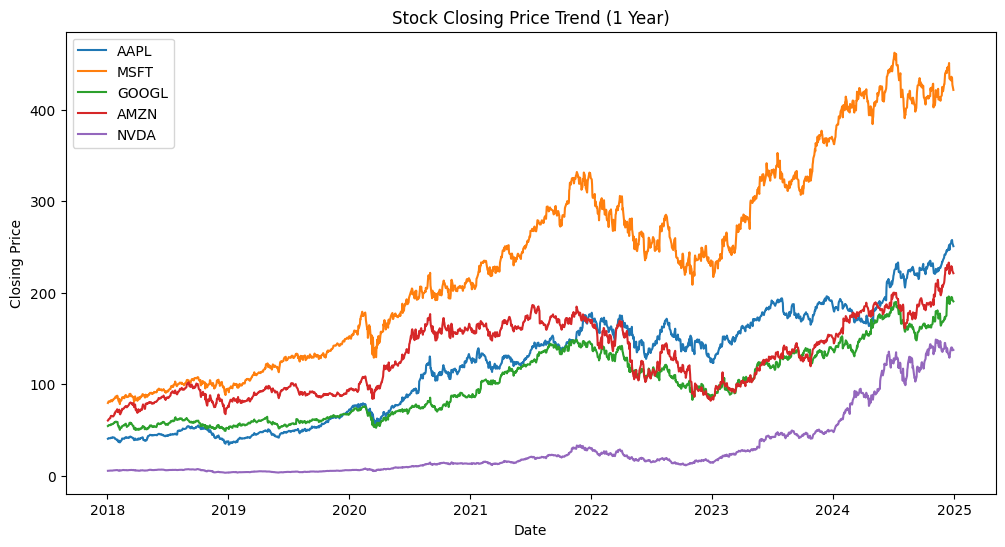

In [8]:
# Closing Price Trend (Time Series)

plt.figure(figsize=(12, 6))

for sym in symbols:
    plt.plot(data[sym].index, data[sym]["Close"], label=sym)

plt.title("Stock Closing Price Trend (1 Year)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

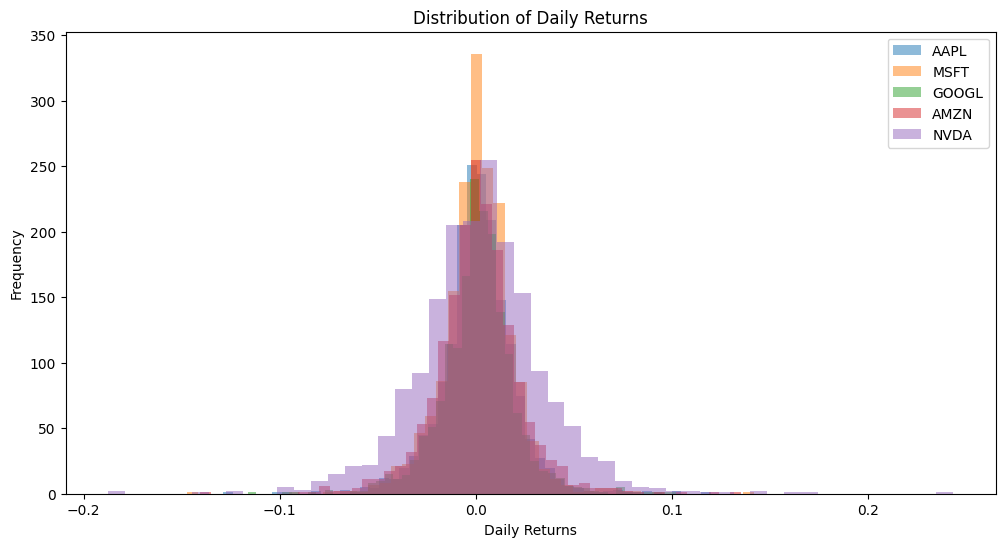

In [10]:
# Daily Returns Distribution (Risk Visualization)

plt.figure(figsize=(12, 6))

for sym in symbols:
    returns = data[sym]["Close"].pct_change()
    plt.hist(returns.dropna(), bins=50, alpha=0.5, label=sym)

plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/tmp/ipython-input-531149832.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  volatility.append(float(vol))
/tmp/ipython-input-531149832.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  volatility.append(float(vol))
/tmp/ipython-input-531149832.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  volatility.append(float(vol))
/tmp/ipython-input-531149832.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  volatility.append(float(vol))
/tmp/ipython-input-531149832.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser

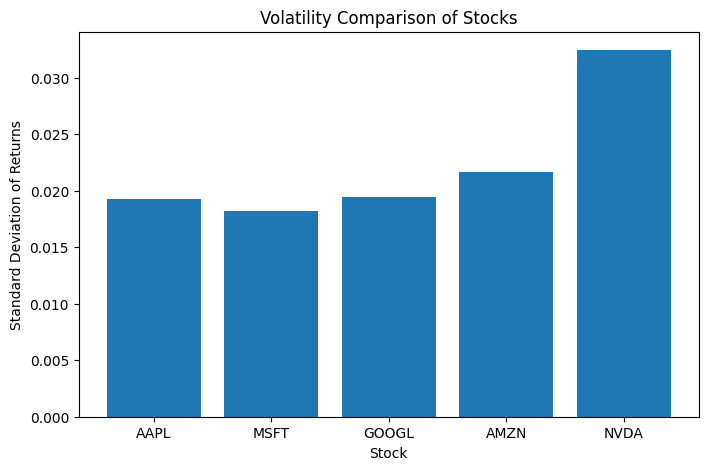

In [14]:
# Volatility Comparison (Bar Chart)

volatility = []

for sym in symbols:
    vol = data[sym]["Close"].pct_change().dropna().std()
    volatility.append(float(vol))

vol_df = pd.DataFrame({
    "Stock": symbols,
    "Volatility": volatility
})

plt.figure(figsize=(8, 5))
plt.bar(vol_df["Stock"].values, vol_df["Volatility"].values)
plt.title("Volatility Comparison of Stocks")
plt.xlabel("Stock")
plt.ylabel("Standard Deviation of Returns")
plt.show()

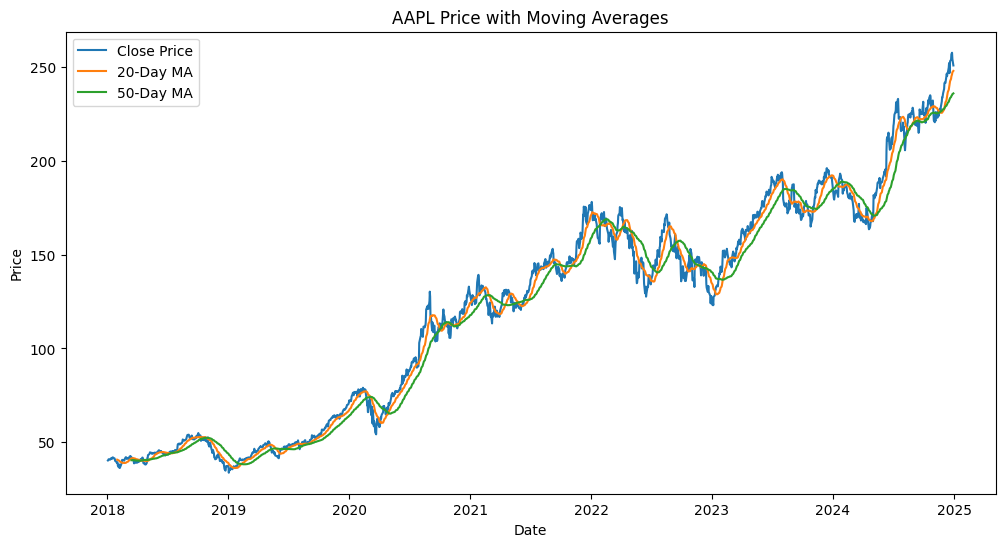

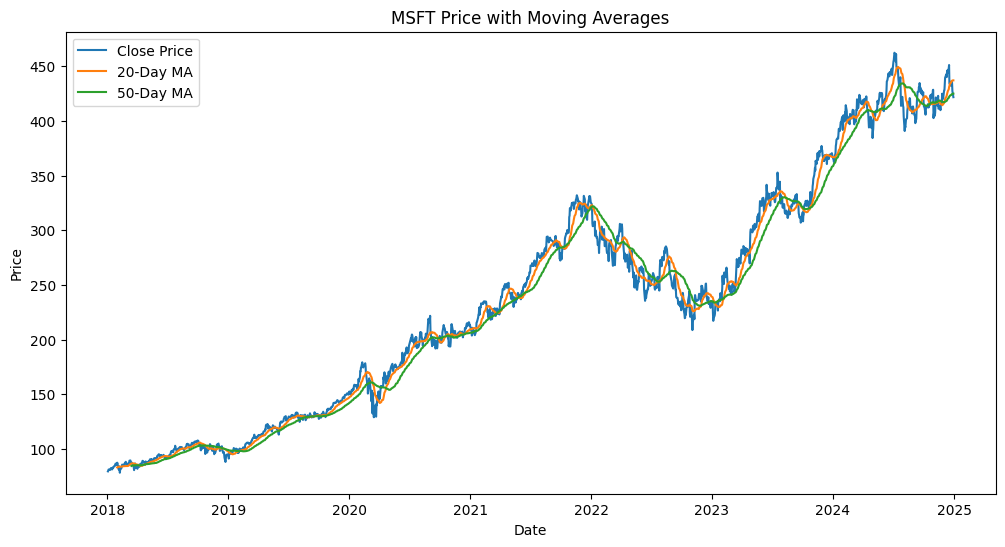

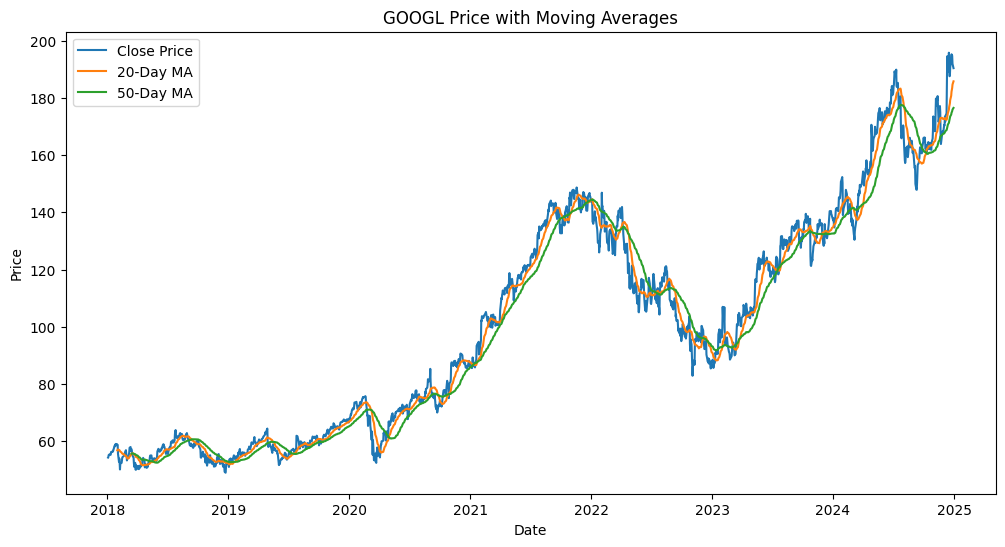

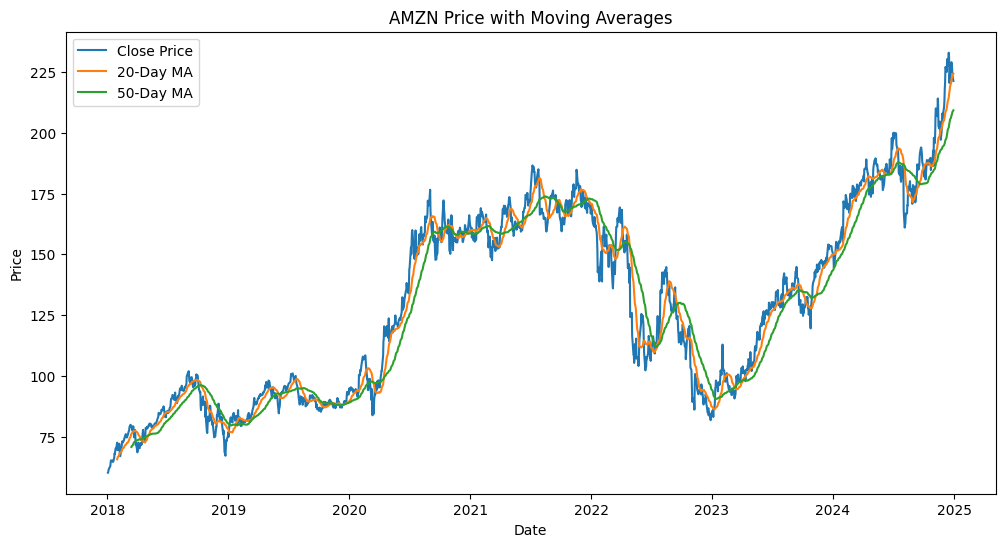

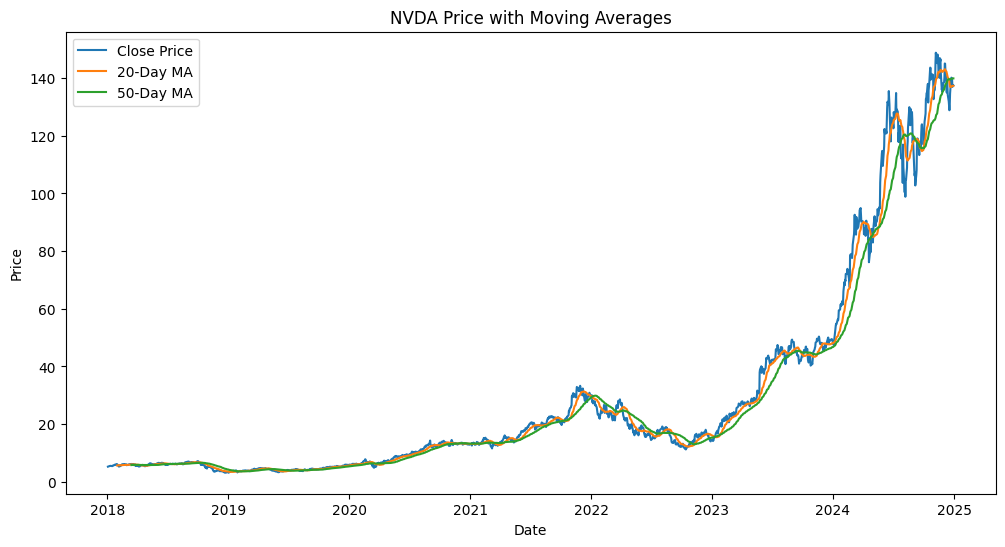

In [12]:
# Moving Averages (Trend Strength)

window_short = 20
window_long = 50

for sym in symbols:
    df = data[sym].copy()
    df["MA20"] = df["Close"].rolling(window_short).mean()
    df["MA50"] = df["Close"].rolling(window_long).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Close Price")
    plt.plot(df.index, df["MA20"], label="20-Day MA")
    plt.plot(df.index, df["MA50"], label="50-Day MA")
    plt.title(f"{sym} Price with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

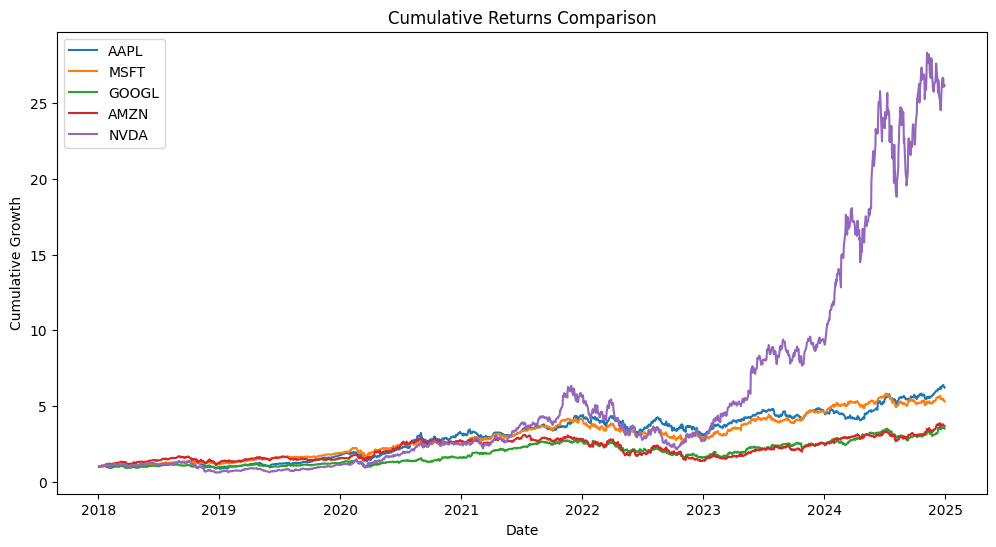

In [13]:
# Cumulative Returns (Performance Comparison)

plt.figure(figsize=(12, 6))

for sym in symbols:
    returns = data[sym]["Close"].pct_change()
    cumulative_returns = (1 + returns).cumprod()
    plt.plot(cumulative_returns, label=sym)

plt.title("Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth")
plt.legend()
plt.show()